# Pandas Basic2



In [34]:
from IPython.display import Image 

import pandas 
import pandas as pd
import numpy as np

## 2. Essential functionality

- Series나 DataFrame에 저장된 데이터를 다루는 방법

## 2.1 Reindexing

In [3]:
obj = pd.Series([4.5,7.2,-5.3,3.6], index = ['d','b','a','c'])
obj

d    4.5
b    7.2
a   -5.3
c    3.6
dtype: float64

In [8]:
obj2 = obj.reindex(['a','b','c','d','e'])

obj2

a   -5.3
b    7.2
c    3.6
d    4.5
e    NaN
dtype: float64

In [10]:
# 값이 없는 것은 0을 채우기
obj.reindex(['a','b','c','d','e'], fill_value = 0)

a   -5.3
b    7.2
c    3.6
d    4.5
e    0.0
dtype: float64

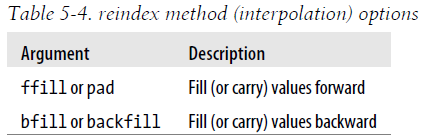

In [75]:
# reindex 메소드(보간) 옵션
Image('./images/table5_4.png')

In [13]:
#ffill 메소드: 앞에 값으로 누란된 값 채워넣기
obj3 = pd.Series(['blue','purple','yello'], index=[0,2,4])
obj3.reindex(range(6), method = 'ffill')

0      blue
1      blue
2    purple
3    purple
4     yello
5     yello
dtype: object

In [14]:
# bfill메소드: 뒤의 값으로 누락된 값을 채워넣기
obj3 = pd.Series(['blue','purple','yellow'], index=[0,2,4])
obj3.reindex(range(6), method = 'bfill')

0      blue
1    purple
2    purple
3    yellow
4    yellow
5       NaN
dtype: object

In [21]:
frame = pd.DataFrame(np.arange(9).reshape((3, 3)), index=['a', 'c', 'd'],
                  columns=['Ohio', 'Texas', 'California'])
frame

,Ohio,Texas,California
a,0,1,2
c,3,4,5
d,6,7,8


In [23]:
frame2 = frame.reindex(['a','b','c','d'])
frame2

,Ohio,Texas,California
a,0.0,1.0,2.0
b,NaN,NaN,NaN
c,3.0,4.0,5.0
d,6.0,7.0,8.0


In [28]:
# colname 지정, 값이 없으면 Nan값 지정
state = ['Texas','Utah','California']

frame.reindex(columns = state)  

,Texas,Utah,California
a,1,NaN,2
c,4,NaN,5
d,7,NaN,8


In [31]:
frame

,Ohio,Texas,California
a,0,1,2
c,3,4,5
d,6,7,8


In [30]:
# DF.loc()
frame.loc[['a','b','c','d'], states]

NameError: name 'states' is not defined

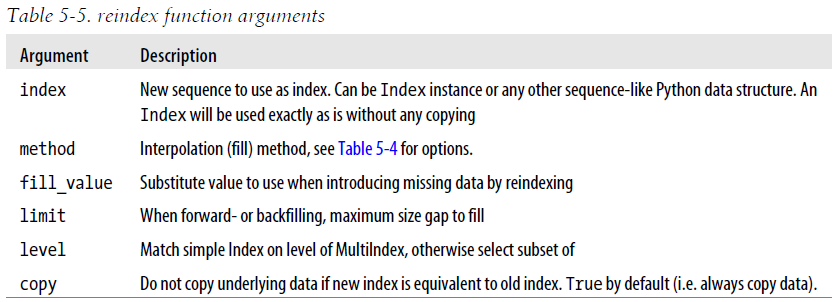

In [36]:
# 재색인 함수 인자
Image('./images/table5_5.png')

## Dropping entries from an aixs

> 하나의 로우, 또는 컬럼 삭제하기
- 칼럼 삭제: drop([칼럼명], axis = 1)
- 로우 삭제: drop([로우명], axis = 0) or drop([로우명]

In [37]:
obj = pd.Series(np.arange(5.), index = ['a','b','c','d','e'])
new_obj = obj.drop('c')
new_obj

a    0.0
b    1.0
d    3.0
e    4.0
dtype: float64

In [38]:
obj.drop(['d','c'])

a    0.0
b    1.0
e    4.0
dtype: float64

In [40]:
obj  # drop을 사용해도 실제 데이터에는 변화가 없음.

a    0.0
b    1.0
c    2.0
d    3.0
e    4.0
dtype: float64

In [41]:
data = pd.DataFrame(np.arange(16).reshape((4,4)),
                    index=['Ohio','Colorado','Utah','New York'],
                    columns =['one','two','three','four'])
data
                    

,one,two,three,four
Ohio,0,1,2,3
Colorado,4,5,6,7
Utah,8,9,10,11
New York,12,13,14,15


In [43]:
data.drop(['Colorado','Ohio'])

,one,two,three,four
Utah,8,9,10,11
New York,12,13,14,15


In [44]:
data

,one,two,three,four
Ohio,0,1,2,3
Colorado,4,5,6,7
Utah,8,9,10,11
New York,12,13,14,15


In [45]:
# aist = 1 -> column 방향
data.drop('two', axis = 1)

,one,three,four
Ohio,0,2,3
Colorado,4,6,7
Utah,8,10,11
New York,12,14,15


## Indexing, selercion, and filtering

> 색인하기, 선택하기, 거르기
- Series의 색인은 NumPy 배열의 생인과 유사하게 동작
- Series의 색인은 정수가 아니어도 된다
- **라벨 이름으로 슬라이싱: 시작점, 끝점 포함**

In [48]:
obj = pd.Series(np.arange(4.), index =['a','b','c','d'])

obj

a    0.0
b    1.0
c    2.0
d    3.0
dtype: float64

In [49]:
obj['b']

1.0

In [50]:

obj[1]

1.0

In [51]:
obj[2:4]


c    2.0
d    3.0
dtype: float64

In [53]:
obj[['b','a','d']]

b    1.0
a    0.0
d    3.0
dtype: float64

In [54]:
obj[[1,3]]

b    1.0
d    3.0
dtype: float64

In [55]:
obj[obj < 2]

a    0.0
b    1.0
dtype: float64


- 라벨 이름으로 슬라이싱 할 경우, 끝점도 포함된다

In [57]:
obj['b':'c']

b    1.0
c    2.0
dtype: float64

In [58]:
obj['b':'c'] = 5
obj

a    0.0
b    5.0
c    5.0
d    3.0
dtype: float64

In [59]:
data = pd.DataFrame(np.arange(16).reshape((4,4)),
                   index = ['Ohio','Colorado','Utah','NewYourk'],
                   columns = ['one','two','three','four'])
data

,one,two,three,four
Ohio,0,1,2,3
Colorado,4,5,6,7
Utah,8,9,10,11
NewYourk,12,13,14,15


In [60]:
data['two']

Ohio         1
Colorado     5
Utah         9
NewYourk    13
Name: two, dtype: int32

In [61]:
data[['three','one']]

,three,one
Ohio,2,0
Colorado,6,4
Utah,10,8
NewYourk,14,12


In [62]:
data[:2]

,one,two,three,four
Ohio,0,1,2,3
Colorado,4,5,6,7


In [63]:
# 불린 인덱스
data[data['three']>5]

,one,two,three,four
Colorado,4,5,6,7
Utah,8,9,10,11
NewYourk,12,13,14,15


In [64]:
# 요건 문법적으로 모순이 있으나, 실용성에 기인한 것일분
data < 5

,one,two,three,four
Ohio,True,True,True,True
Colorado,True,False,False,False
Utah,False,False,False,False
NewYourk,False,False,False,False


In [65]:
data[data<5] = 0

In [66]:

data

,one,two,three,four
Ohio,0,0,0,0
Colorado,0,5,6,7
Utah,8,9,10,11
NewYourk,12,13,14,15


In [67]:
data.loc['Colorado', ['two','three']]

two      5
three    6
Name: Colorado, dtype: int32

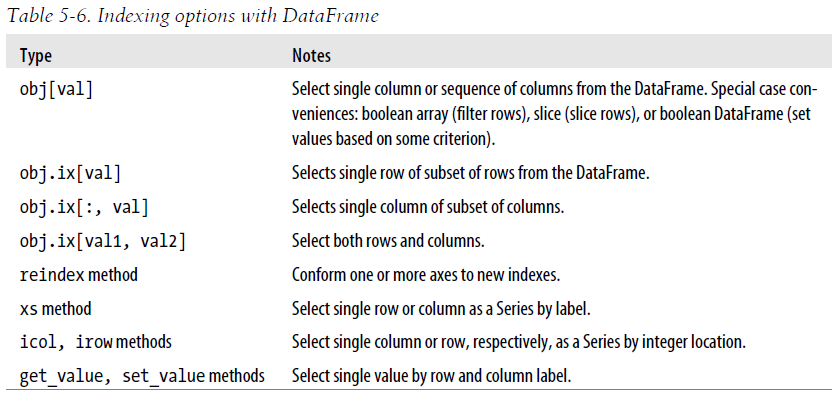

In [69]:
Image('./images/table5_6.png')

## Arithmetic and data alignment

> 산술연산과 데이터 정렬
- pandas에서 중요한 기능은 색인이 다른 객체 간의 산술연산
- 객체를 더할 때 짝이 만지 않는 색인이 있다면 결과에 두 색인이 통합된다

In [71]:
s1 = pd.Series([7.3, -2.5,3.4,1.5], index=['a','c','d','e'])
s2 = pd.Series([-2.1,3.6,-1.5,4,3.1], index=['a','c','e','f','g'])

In [72]:
s1


a    7.3
c   -2.5
d    3.4
e    1.5
dtype: float64

In [73]:
s2

a   -2.1
c    3.6
e   -1.5
f    4.0
g    3.1
dtype: float64

In [77]:
s1 + s2 # 합집함, 한쪽만 있는 경우는 Nan처리

a    5.2
c    1.1
d    NaN
e    0.0
f    NaN
g    NaN
dtype: float64

In [79]:
df1 = pd.DataFrame(np.arange(9.).reshape((3, 3)), columns=list('bcd'),
                index=['Ohio', 'Texas', 'Colorado'])
df2 = pd.DataFrame(np.arange(12.).reshape((4, 3)), columns=list('bde'),
                index=['Utah', 'Ohio', 'Texas', 'Oregon'])


In [80]:
df1

,b,c,d
Ohio,0.0,1.0,2.0
Texas,3.0,4.0,5.0
Colorado,6.0,7.0,8.0


In [82]:

df2

,b,d,e
Utah,0.0,1.0,2.0
Ohio,3.0,4.0,5.0
Texas,6.0,7.0,8.0
Oregon,9.0,10.0,11.0


In [83]:
df1 + df2

,b,c,d,e
Colorado,NaN,NaN,NaN,NaN
Ohio,3.0,NaN,6.0,NaN
Oregon,NaN,NaN,NaN,NaN
Texas,9.0,NaN,12.0,NaN
Utah,NaN,NaN,NaN,NaN


- Arithmetic methods with fill values
- 산술 연산 메소드에 채워 넣을 값 지정하기

In [85]:
df1 = pd.DataFrame(np.arange(12.).reshape((3, 4)), columns=list('abcd'))
df2 = pd.DataFrame(np.arange(20.).reshape((4, 5)), columns=list('abcde'))

In [86]:
df1

,a,b,c,d
0,0.0,1.0,2.0,3.0
1,4.0,5.0,6.0,7.0
2,8.0,9.0,10.0,11.0


In [87]:
df2

,a,b,c,d,e
0,0.0,1.0,2.0,3.0,4.0
1,5.0,6.0,7.0,8.0,9.0
2,10.0,11.0,12.0,13.0,14.0
3,15.0,16.0,17.0,18.0,19.0


In [89]:
df1+df2

,a,b,c,d,e
0,0.0,2.0,4.0,6.0,NaN
1,9.0,11.0,13.0,15.0,NaN
2,18.0,20.0,22.0,24.0,NaN
3,NaN,NaN,NaN,NaN,NaN


In [91]:
# 없는 값을 0으로 채워넣고, 더하기
df1.add(df2, fill_value = 0)

,a,b,c,d,e
0,0.0,2.0,4.0,6.0,4.0
1,9.0,11.0,13.0,15.0,9.0
2,18.0,20.0,22.0,24.0,14.0
3,15.0,16.0,17.0,18.0,19.0


In [92]:
df1.reindex(columns = df2.columns, fill_value= 0)

,a,b,c,d,e
0,0.0,1.0,2.0,3.0,0
1,4.0,5.0,6.0,7.0,0
2,8.0,9.0,10.0,11.0,0


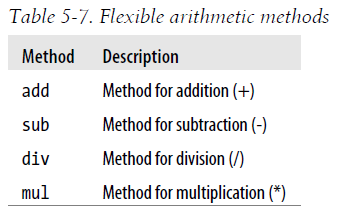

In [94]:
# 산술 연산 메소드
Image('./images/table5_7.png')

- operations between DataFrame and Series
- DF와 Series 간의 연산

In [95]:
arr = np.arange(12).reshape((3,4))
arr

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11]])

In [96]:
arr[0]

array([0, 1, 2, 3])

In [98]:
arr - arr[0]  # 모든 행에서 빼줌

array([[0, 0, 0, 0],
       [4, 4, 4, 4],
       [8, 8, 8, 8]])

In [101]:
frame = pd.DataFrame(np.arange(12).reshape((4,3)), columns = list('bde'),
                  index = ['Utah','Ohio','Texa','Oregon'])
frame
                  


,b,d,e
Utah,0,1,2
Ohio,3,4,5
Texa,6,7,8
Oregon,9,10,11


In [102]:
series = frame.iloc[0]
series

b    0
d    1
e    2
Name: Utah, dtype: int32

In [103]:
frame - series

,b,d,e
Utah,0,0,0
Ohio,3,3,3
Texa,6,6,6
Oregon,9,9,9


In [104]:
series2 = pd.Series(range(3), index=['b','e','f'])
series2

b    0
e    1
f    2
dtype: int64

In [105]:
frame

,b,d,e
Utah,0,1,2
Ohio,3,4,5
Texa,6,7,8
Oregon,9,10,11


In [106]:
frame + series2

,b,d,e,f
Utah,0.0,NaN,3.0,NaN
Ohio,3.0,NaN,6.0,NaN
Texa,6.0,NaN,9.0,NaN
Oregon,9.0,NaN,12.0,NaN


In [107]:
series3 = frame['d']
series3

Utah       1
Ohio       4
Texa       7
Oregon    10
Name: d, dtype: int32

In [109]:
frame

,b,d,e
Utah,0,1,2
Ohio,3,4,5
Texa,6,7,8
Oregon,9,10,11


In [111]:
frame.sub(series3, axis = 0)

,b,d,e
Utah,-1,0,1
Ohio,-1,0,1
Texa,-1,0,1
Oregon,-1,0,1


## Function application and mapping

> 함수 적용과 매핑
- pandas 객체에도 NumPy의 유니버셜 함수를 적용할 수 있다.
- 유니버셜 함수: 배열의 각 원소에 적용되는 메소드

In [112]:
frame =  pd.DataFrame(np.random.randn(4, 3), columns = list('bde'),
                   index = ['Utah','Ohio','Texas','Oregon'])
frame

,b,d,e
Utah,1.753888,-0.721946,-1.279143
Ohio,-0.841279,0.625430,0.995213
Texas,-0.087140,0.095553,0.489703
Oregon,1.342348,-0.206063,2.457084


In [113]:
np.abs(frame)

,b,d,e
Utah,1.753888,0.721946,1.279143
Ohio,0.841279,0.625430,0.995213
Texas,0.087140,0.095553,0.489703
Oregon,1.342348,0.206063,2.457084


In [114]:
f = lambda x: x.max() - x.min()
frame.apply(f)

b    2.595167
d    1.347376
e    3.736227
dtype: float64

In [115]:
frame.apply(f, axis = 1)

Utah      3.033031
Ohio      1.836492
Texas     0.576844
Oregon    2.663147
dtype: float64

In [1]:
def f(x):
    return pd.Series([x.min(), x.max()], index=['min', 'max'])

frame.apply(f)
# apply함수: ()안에 있는 로직, 함수 등은 dataframe에 적용시기는 것

NameError: name 'frame' is not defined

In [119]:
frame

,b,d,e
Utah,1.753888,-0.721946,-1.279143
Ohio,-0.841279,0.625430,0.995213
Texas,-0.087140,0.095553,0.489703
Oregon,1.342348,-0.206063,2.457084


In [2]:
# 실수값을 문자열 포맷으로 변환

#dataframe 객체에 적용: applymau()함수 이용
format = lambda x: '%.2f' %x
frame.applymap(format)

NameError: name 'frame' is not defined

In [121]:
# Series 객체에는 map함수 이용
frame['e'].map(format)

Utah      -1.28
Ohio       1.00
Texas      0.49
Oregon     2.46
Name: e, dtype: object

## Sorting and ranking
 
 > 인덱스 기준 정렬
 - A.sort_index(): 인덱스 순으로 정렬
 - A.sort_index(axis = 1)  : 컬럼 기준
 - A.sort_index(axis = 1, ascending = False)  : 내림차순 정리
 
 > 값 기준 정렬
 - A.sort_values(by = ['컬럼명']): 특정 컬럼값 기준 정렬
 
 

In [123]:
obj = pd.Series(range(4), index = ['d','a','b','c'])
obj.sort_index()

a    1
b    2
c    3
d    0
dtype: int64

In [125]:
frame = pd.DataFrame(np.arange(8).reshape((2, 4)), index = ['three', 'one'],
                    columns = ['d','a','b','c'])

frame.sort_index()

,d,a,b,c
one,4,5,6,7
three,0,1,2,3


In [126]:
frame.sort_index(axis = 1)

,a,b,c,d
three,1,2,3,0
one,5,6,7,4


In [127]:
frame.sort_index(axis = 1, ascending = False)

,d,c,b,a
three,0,3,2,1
one,4,7,6,5


In [129]:
obj = pd.Series([4,7,-3,2])
obj.sort_values()

2   -3
3    2
0    4
1    7
dtype: int64

In [130]:
obj = pd.Series([4, np.nan, 7, np.nan, -3, 2])
obj.sort_values()  # Nan 값은 끝으로

4   -3.0
5    2.0
0    4.0
2    7.0
1    NaN
3    NaN
dtype: float64

In [135]:
frame = pd.DataFrame({'b': [4, 7, -3, 2], 'a': [0, 1, 0, 1]})
frame

,b,a
0,4,0
1,7,1
2,-3,0
3,2,1


In [136]:
frame.sort_values(by='b')

,b,a
2,-3,0
3,2,1
0,4,0
1,7,1


In [137]:
frame.sort_values(by = ['b','a'])

,b,a
2,-3,0
3,2,1
0,4,0
1,7,1


- rank함수


In [138]:
obj = pd.Series([7, -5, 7, 4, 2, 0, 4])
obj

0    7
1   -5
2    7
3    4
4    2
5    0
6    4
dtype: int64

In [140]:
obj.rank()  # 공동 순위일 경우에는 평균값으로 표시

0    6.5
1    1.0
2    6.5
3    4.5
4    3.0
5    2.0
6    4.5
dtype: float64

In [142]:
obj.rank(method = 'first')

0    6.0
1    1.0
2    7.0
3    4.0
4    3.0
5    2.0
6    5.0
dtype: float64

In [144]:

obj.rank(ascending =False, method = 'max')

0    2.0
1    7.0
2    2.0
3    4.0
4    5.0
5    6.0
6    4.0
dtype: float64

In [145]:
obj.rank(method = 'dense')

0    5.0
1    1.0
2    5.0
3    4.0
4    3.0
5    2.0
6    4.0
dtype: float64

In [147]:
frame = pd.DataFrame ({'b': [4.3, 7, -3, 2],
                      'a': [0,1,0,1],
                      'c': [-2, 5, 8, -2.5]})
frame

,b,a,c
0,4.3,0,-2.0
1,7.0,1,5.0
2,-3.0,0,8.0
3,2.0,1,-2.5


In [157]:
frame.rank(axis = 1) 

,b,a,c
0,3.0,2.0,1.0
1,3.0,1.0,2.0
2,1.0,2.0,3.0
3,3.0,2.0,1.0


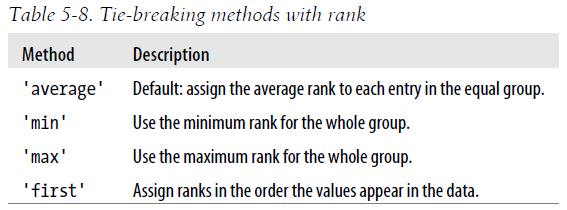

In [149]:
# 같은 순위값을 처리하는 메소드
Image('./images/table5_8.png')

- Axis indexes with duplicate values

> 중복 색인
- DF의 색인값은 유일해야 하지만, 강제사항은 아니다

In [150]:
obj = pd.Series(range(5), index = ['a','a','b','b','c'])
obj

a    0
a    1
b    2
b    3
c    4
dtype: int64

In [151]:
obj.index.is_unique

False

In [152]:
obj['a']

a    0
a    1
dtype: int64

In [153]:
obj['c']

4

In [154]:
df = pd.DataFrame(np.random.randn(4, 3), index = ['a','a','b','b'])
df

,0,1,2
a,-0.248000,-0.059935,-0.118522
a,1.610584,-0.293238,0.249574
b,-0.381962,-0.785471,-1.469682
b,-0.738190,-2.565617,-0.706225


In [155]:
df.loc['b']

,0,1,2
b,-0.381962,-0.785471,-1.469682
b,-0.738190,-2.565617,-0.706225
